<a href="https://colab.research.google.com/github/Hyunggilwoo/CSE351/blob/master/422_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
This code will generate the following types of graph:
Cycle graph, wheel graph, line graph, and a line + point graph


In [50]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

num = 150

In [97]:
## To print following graphs, pass the following:
# wheel_graph = nx.wheel_graph(num)
# path_graph = nx.path_graph(num)
# cycle_graph = nx.cycle_graph(num)
# 
def adjacency_matrix(graph_type):

  adjacency_matrix = nx.adjacency_matrix(graph_type)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix
  # print(dense_adjacency_matrix)

In [98]:
def generate_diagonal_matrix(adjacency_matrix, size = num):
  '''
  https://docs.google.com/presentation/d/1oQ_2XM3tHJvdC__9N6n-TbN3DxSgT6DteeP1UeiDgQ0/edit#slide=id.g86477fec6b_1_1687
  '''
  diagonal_matrix = np.zeros((size, size))
  a = adjacency_matrix
  
  row_sum = np.sum(adjacency_matrix, axis = 1)

  for i in range(len(row_sum)):
    # array[i][i] = row_sum[i]
    diagonal_matrix[i, i] = row_sum[i]
    
  # print(diagonal_matrix)
  return diagonal_matrix


def laplacian_graph(adjacency, diagonal):
  '''
  Output Laplacian matrix : diagonal - Adjacency matrix
  '''
  return diagonal - adjacency

In [99]:
## geneate the cycle graph's diagonal graph
adjacency = adjacency_matrix(nx.cycle_graph(num))

diagonal = generate_diagonal_matrix(adjacency)

## Generate laplacian graph
LG = laplacian_graph(adjacency, diagonal)
print(LG)

[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]


In [100]:

# Generate the wheel graph
G = nx.wheel_graph(num)

def wheel_adjacency_matrix(graph_type):
  cycle_graph = graph_type # nx.cycle_graph(num)
  adjacency_matrix = nx.adjacency_matrix(G, dtype=np.float64)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix
# Calculate adjacency matrix
adjacency_wheel = adjacency_matrix(G)
# flips the ordering of the graph to output it correctly
adjacency_wheel = adjacency_wheel[::-1, ::-1]
# Calculate degree matrix
degree_wheel = np.diag(np.sum(np.array(adjacency_wheel), axis=1))

# Calculate Laplacian matrix
LG_wheel = degree_wheel - adjacency_wheel
print(LG_wheel)

[[  3  -1   0 ...   0  -1  -1]
 [ -1   3  -1 ...   0   0  -1]
 [  0  -1   3 ...   0   0  -1]
 ...
 [  0   0   0 ...   3  -1  -1]
 [ -1   0   0 ...  -1   3  -1]
 [ -1  -1  -1 ...  -1  -1 149]]


In [101]:
## generate the line graph
adjacency2 = adjacency_matrix(nx.path_graph(num))

diagonal2 = generate_diagonal_matrix(adjacency)

LG2 = laplacian_graph(adjacency2, diagonal2)
print(LG2)

[[ 2. -1.  0. ...  0.  0.  0.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


In [102]:
## generate the line + point graph
def path_point_graph():
  path_graph = nx.path_graph(num)

  # Connect all the n-1 nodes to the nth point
  for i in range(num - 1):
      path_graph.add_edge(i, num - 1)
  adjacency_matrix = nx.adjacency_matrix(path_graph)
  dense_adjacency_matrix = adjacency_matrix.toarray()

  return dense_adjacency_matrix  

adjacency3 = path_point_graph()
diagonal3 = generate_diagonal_matrix(adjacency3)

## Generate laplacian graph
LG3 = laplacian_graph(adjacency3, diagonal3)
print(LG3)

[[  2.  -1.   0. ...   0.   0.  -1.]
 [ -1.   3.  -1. ...   0.   0.  -1.]
 [  0.  -1.   3. ...   0.   0.  -1.]
 ...
 [  0.   0.   0. ...   3.  -1.  -1.]
 [  0.   0.   0. ...  -1.   2.  -1.]
 [ -1.  -1.  -1. ...  -1.  -1. 149.]]


In [115]:
def generate_evalue_evector(matrix):
  '''
  Return largest eigen_values and the corresponding eigenvectors
  '''

  w, v = LA.eig(matrix)

  # Sort eigenvalues and eigenvectors based on eigenvalues' magnitudes of laplacian matrix
  sorted_indices = np.argsort(w)
  sorted_eigenvalues = w[sorted_indices]
  sorted_eigenvectors = v[:, sorted_indices]

  # Get the 2 largesteigenvalue-eigenvector pairs
  largest_eigenvalues = sorted_eigenvalues[-2:]
  largest_eigenvectors = sorted_eigenvectors[:, -2:]

  return sorted_eigenvalues, sorted_eigenvectors

def generate_smallest_evalue_evector(matrix):
  '''
  Return smallest eigen_values and the corresponding eigenvectors
  '''

  w, v = LA.eig(matrix)

  # Sort eigenvalues and eigenvectors based on eigenvalues' magnitudes of laplacian matrix
  sorted_indices = np.argsort(w)
  sorted_eigenvalues = w[sorted_indices]
  sorted_eigenvectors = v[:, sorted_indices]

  # Get the 2 smallest eigenvalue-eigenvector pairs
  smallest_eigenvalues = sorted_eigenvalues[:2]
  smallest_eigenvectors = sorted_eigenvectors[:, :2]
  
  return smallest_eigenvalues, smallest_eigenvectors

def generate_eigvalue_eigvector_all_graphs(laplacian, adjaceny, name):
  '''
  matrix must be a collection of all 4 matrices
  '''
  # generate values for laplacian matrix
  laplacian_eigenvalues, laplacian_eigenvectors = generate_evalue_evector(laplacian)
  # laplacian_evalues, laplacian_evectors = generate_evalue_evector(laplacian)

  # Obtain 2 largest laplacian eigenvectors and eigenvalues
  laplacian_largest_eigenvalues = laplacian_eigenvalues[-2:]
  laplacian_largest_eigenvectors = laplacian_eigenvectors[:, -2:]

  #Obtain 2 smallest laplacain eigenvectors and eigenvalues 
  laplacian_smallest_evalues = laplacian_eigenvalues[:2]
  laplacian_smallest_evectors = laplacian_eigenvectors[:, :2]

## TODO: implement it 
#  smallest_eigenvalues = sorted_eigenvalues[:2]
#  smallest_eigenvectors = sorted_eigenvectors[:, :2]

## TODO: Implement it
  # largest_eigenvalues = sorted_eigenvalues[-2:]
  # largest_eigenvectors = sorted_eigenvectors[:, -2:]
  # generate values for adjacency matrix
  adjaceny_eigenvalues, adjaceny_eigenvectors = generate_evalue_evector(adjaceny)
#  adjaceny_evalues, adjaceny_evectors = generate_smallest_evalue_evector(adjaceny)

  # Obtain 2 largest adjacency eigenvectors and eigenvalues
  adjaceny_largest_eigenvalues = adjaceny_eigenvalues[-2:]
  adjaceny_smallest_evectors = adjaceny_eigenvectors[:, -2:]

  #Obtain 2 smallest laplacain eigenvectors and eigenvalues 
  adjaceny_smallest_evalues = adjaceny_eigenvalues[:2]
  adjaceny_smallest_evectors = adjaceny_eigenvectors[:, :2]

  # Plot the eigenvectors corresponding to the 2 largest and 2 smallest eigenvalues
  fig, ax = plt.subplots()

  # plotting laplacian matrix
  for idx, eigenvalue in enumerate(laplacian_largest_eigenvalues):
      ax.quiver(0, 0, laplacian_largest_eigenvectors[0, idx], laplacian_largest_eigenvectors[1, idx], angles='xy', scale_units='xy', scale=0.5, color='g', label=f'Largest Eigenvalue {idx+1}: {eigenvalue:.2f}')

  for idx, eigenvalue in enumerate(laplacian_smallest_evalues):
      ax.quiver(0, 0, laplacian_smallest_evectors[0, idx], laplacian_smallest_evectors[1, idx], angles='xy', scale_units='xy', scale=0.5, color='y', label=f'Smallest Eigenvalue {idx+1}: {eigenvalue:.2f}')

  for idx, eigenvalue in enumerate(adjaceny_largest_eigenvalues):
      ax.quiver(0, 0, adjaceny_smallest_evectors[0, idx], adjaceny_smallest_evectors[1, idx], angles='xy', scale_units='xy', scale=0.5, color='r', label=f'Largest Eigenvalue {idx+1}: {eigenvalue:.2f}')

  for idx, eigenvalue in enumerate(adjaceny_smallest_evalues):
      ax.quiver(0, 0, adjaceny_smallest_evectors[0, idx], adjaceny_smallest_evectors[1, idx], angles='xy', scale_units='xy', scale=0.5, color='b', label=f'Smallest Eigenvalue {idx+1}: {eigenvalue:.2f}')

  # plotting adjacency matrix
  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  ax.set_aspect('equal')

  plt.legend()
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plt.title('Eigenvectors of 2 Largest and 2 Smallest Eigenvalues')
  plt.grid()
  plt.show()

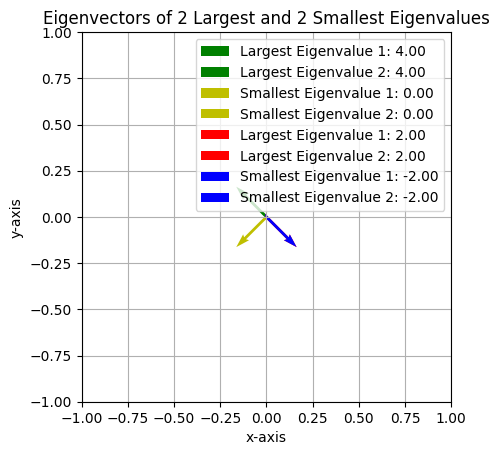

In [116]:
## Plot the cycle graph
generate_eigvalue_eigvector_all_graphs(LG, adjacency, "Cycle_graph")


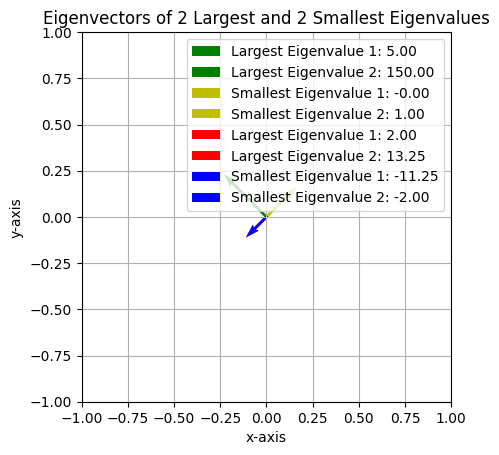

In [117]:
## Plot wheel graph
generate_eigvalue_eigvector_all_graphs(LG_wheel, adjacency_wheel, "Wheel_graph")

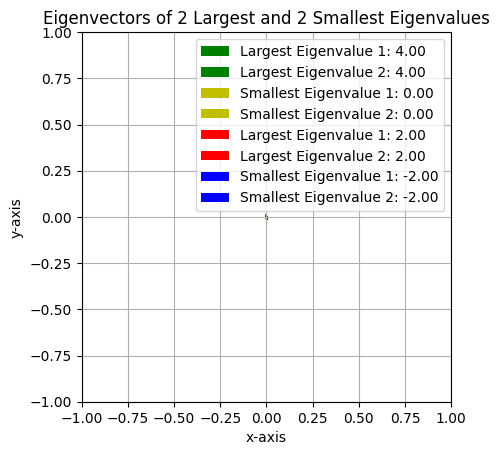

In [118]:
## Plot path graph
generate_eigvalue_eigvector_all_graphs(LG2, adjacency2, "Path_graph")

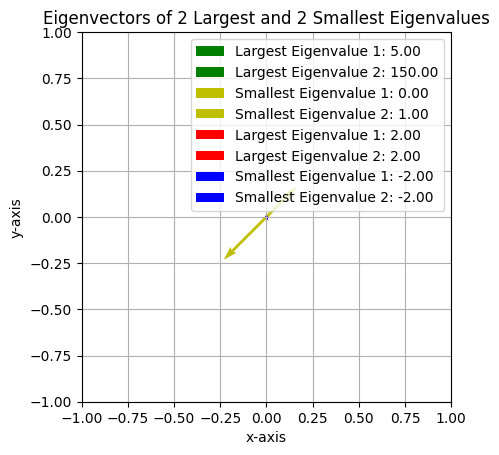

In [119]:
## Plot path graph
generate_eigvalue_eigvector_all_graphs(LG3, adjacency2, "line_point_graph")

In [ ]:
## plot spectral embedding of the 4 graphs from above
def plot_spectral_embedding(laplacian, adjaceny):
  laplacian_smallest_evalues, laplacian_smallest_evectors = generate_smallest_evalue_evector(laplacian)

  second_smallest_eigenvector = laplacian_smallest_evectors[1, idx]
  third_smallest_eigenvector = laplacian_smallest_evectors[2, idx]